## ClassifyAnything Part 3-4: Random Forest

_Supervised learning for classification_

SVM (Support Vector Machine) is a popular supervised learning algorithm used for classification and regression tasks. It finds the best hyperplane that maximizes the margin between classes in the feature space, making it robust and suitable for high-dimensional data. SVM uses kernel functions to handle non-linearly separable problems, making it versatile and powerful for various applications.

### 3-4.1 Import data

In [8]:
# import packages
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

with open("outputs/03_Variables.pkl", 'rb') as file:
    (X_train, X_test, y_train, y_test, kfold) = pickle.load(file)

### 3-4.2 Train the model with cross-validation

In [9]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100, 200],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create the SVM classifier
svm_model = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=kfold, n_jobs=4)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters from grid search
print("Best hyperparameters:")
print(grid_search.best_params_)

# Get the best model from grid search
best_model = grid_search.best_estimator_

Best hyperparameters:
{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}


### 3-4.3 Visualize fine-tuning of hyperparameters

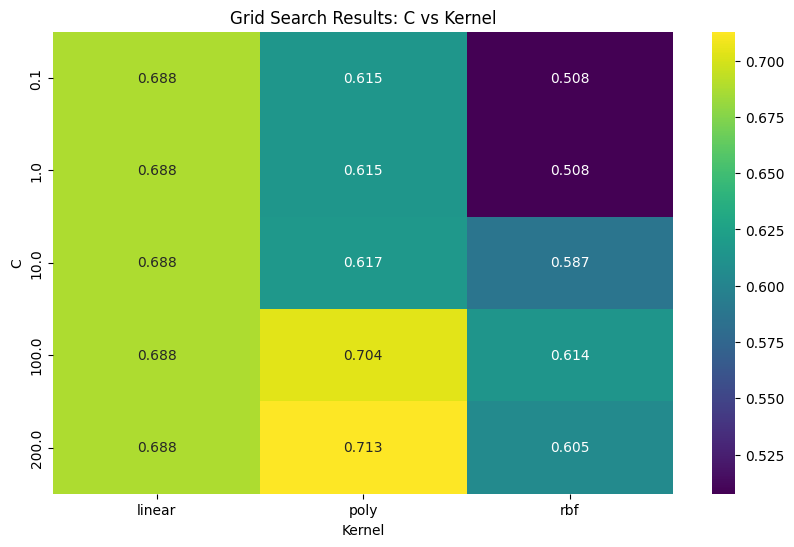

In [10]:
# Access the grid search results
results = pd.DataFrame(grid_search.cv_results_)

# Create a pivot table to reshape the data for the heatmap
pivot_table = results.pivot_table(index='param_C', 
                                  columns='param_kernel', 
                                  values='mean_test_score')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Results: C vs Kernel')
plt.xlabel('Kernel')
plt.ylabel('C')
plt.show()

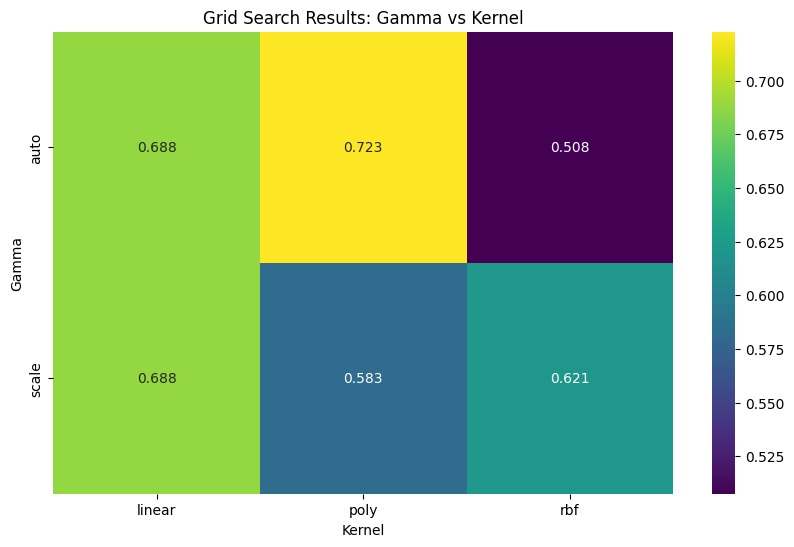

In [11]:
# Create a pivot table to reshape the data for the heatmap
pivot_table = results.pivot_table(index='param_gamma', 
                                  columns='param_kernel', 
                                  values='mean_test_score')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Results: Gamma vs Kernel')
plt.xlabel('Kernel')
plt.ylabel('Gamma')
plt.show()

### 3-4.4 Visualize SVM

### 3-4.5 Save the model

In [12]:
import joblib
# Save the final trained model to a file
joblib.dump(best_model, 'outputs/03-4_SVM_final_model.joblib')

['outputs/03-4_SVM_final_model.joblib']